In [1]:
import sys
sys.path.append('../.')
sys.path.append('../../.')
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

**Load data**

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

dataset = 'ecoli'
X = pd.read_csv('../data/ecoli.csv')
ind = list(range(len(X.columns)))
col_list = X.columns[ind]
ct = ColumnTransformer([('scaler', StandardScaler(), col_list)], remainder='passthrough')

X_ = ct.fit_transform(X)
X = pd.DataFrame(X_, index=X.index, columns=X.columns)

X.head()

,eutG,sucA,atpG,flgD,sucD,yhdM,dnaJ,gltA,b1191,ygcE,...,pspA,nmpC,yheI,ycgX,dnaG,folK,b1963,dnaK,mopB,ftsJ
0,-0.027759,0.122599,0.264658,0.153671,-0.043405,-0.542246,0.619729,0.084389,-0.033762,0.077002,...,-1.156587,1.542883,-0.043889,-0.338571,-0.430860,-0.336886,-0.222453,0.315515,0.629529,0.488032
1,0.645966,-1.182445,-0.297893,-0.958127,-1.348025,0.239957,0.669959,-2.574957,-1.916479,-2.269440,...,0.473894,-0.614861,-2.270004,-1.746693,-1.686743,-2.147293,-2.143699,-2.509647,-2.754116,-2.406968
2,-0.878432,0.415826,-0.418150,0.188152,0.720372,-0.339575,0.828943,0.127842,1.275507,1.133740,...,1.014847,-1.652255,0.251795,0.320190,0.420012,0.150618,-0.217249,0.413813,0.236786,-0.205489
3,-0.458864,0.296419,0.381965,-0.282977,1.698835,0.027809,-1.067956,-2.038131,-0.197604,-0.155425,...,-0.401261,1.322398,-0.196608,-0.457251,-0.027710,-0.278149,0.004377,-0.212255,-0.489394,-0.719893
4,-0.687974,0.685775,0.989306,0.398356,1.347598,-1.213816,-0.896065,-0.525506,-0.363537,0.036631,...,2.540371,-1.535672,-1.128562,-0.764837,-1.085189,-1.031513,-1.461310,-1.059138,-0.743434,-0.567452


**Fit model**

In [3]:
from sklearn.model_selection import train_test_split
from GoggleModel import GoggleModel

In [4]:
X_train, X_test = train_test_split(X, random_state=0, test_size=0.2, shuffle=True)

gen = GoggleModel(
    ds_name=dataset,
    input_dim=X_train.shape[1],
    encoder_dim=64,
    encoder_l=2,
    het_encoding=True,
    decoder_dim=64,
    decoder_l=2,
    threshold=0.1,
    decoder_arch='gcn',
    graph_prior=None,
    prior_mask=None,
    device='cuda',
    beta=0.1,
    learning_rate=0.01,
    seed=0
)
gen.model

Goggle(
  (learned_graph): LearnedGraph(
    (act): Sigmoid()
    (threshold): Threshold(threshold=0.1, value=0)
  )
  (encoder): Encoder(
    (encoder): Sequential(
      (0): Linear(in_features=46, out_features=64, bias=True)
      (1): ReLU()
    )
    (encode_mu): Linear(in_features=64, out_features=46, bias=True)
    (encode_logvar): Linear(in_features=64, out_features=46, bias=True)
  )
  (graph_processor): GraphInputProcessorHomo()
  (decoder): GraphDecoderHomo(
    (decoder): Sequential(
      (0): GraphConv(
        in=64, out=32, normalization=both
        (_activation): Tanh()
      )
      (1): GraphConv(in=32, out=1, normalization=both, activation=None)
    )
  )
)

In [5]:
gen.fit(X_train)

[Epoch 100/1000, patience  1] train: 20.346, val: 20.469
[Epoch 200/1000, patience  2] train: 15.222, val: 15.460
[Epoch 300/1000, patience  0] train: 14.402, val: 14.573
[Epoch 400/1000, patience  3] train: 14.197, val: 14.217
[Epoch 500/1000, patience  5] train: 13.664, val: 13.907
[Epoch 600/1000, patience  7] train: 13.012, val: 13.333
[Epoch 700/1000, patience  3] train: 12.380, val: 13.048
[Epoch 800/1000, patience  0] train: 11.911, val: 12.238
[Epoch 900/1000, patience  1] train: 11.625, val: 12.142
[Epoch 1000/1000, patience 25] train: 11.444, val: 11.936


**Evaluate synthetic data**

In [6]:
X_synth = gen.sample(X_test)
X_synth.head()

,eutG,sucA,atpG,flgD,sucD,yhdM,dnaJ,gltA,b1191,ygcE,...,pspA,nmpC,yheI,ycgX,dnaG,folK,b1963,dnaK,mopB,ftsJ
0,-0.698236,-0.095971,-0.031587,0.099383,0.028075,-0.519048,-0.194198,0.146735,-1.273643,-0.837085,...,0.294002,-0.096261,-0.971219,-0.779063,-0.743165,-0.907202,-0.929850,-1.116211,-1.130818,-1.159618
1,-0.209535,2.392553,2.073645,2.110708,1.996173,-0.149436,0.083837,1.461296,0.939813,0.987802,...,-0.480583,1.060582,0.728339,0.544047,0.662465,0.676580,0.831542,0.661894,0.538286,0.766569
2,1.225215,1.321178,1.034247,1.229947,1.033275,0.904408,0.642187,0.700802,0.854821,0.516967,...,-0.511845,0.082985,-1.188278,-1.726654,-1.695632,-1.132441,-1.319911,-1.261532,-1.206576,-1.238956
3,-0.265571,-2.107262,-1.735053,-1.943782,-1.818728,-0.198100,0.059244,-1.319915,-0.953529,-0.857617,...,0.149365,-0.255688,0.394897,0.788046,0.723131,0.422961,0.455074,0.502275,0.556076,0.539497
4,0.892771,1.438178,1.238947,1.167615,1.203903,0.664826,1.471686,0.762798,1.688752,1.257890,...,0.182552,0.807095,0.959795,0.924552,0.931199,0.853818,0.971883,1.159389,1.120367,1.393388


In [7]:
res = gen.evaluate_synthetic(X_synth, X_test)
print(f'Quality: {res[0]:.3f}')
print(f'Detection: {res[2]:.3f}')
print(f'Performance on real: {res[1][0]:.3f}, on synth: {res[1][1]:.3f}')

Evaluating regression performance...
Evaluating regression performance...
Evaluating regression performance...
Quality: 0.616
Detection: 0.799
Performance on real: 0.148, on synth: 1.696


**Generate TSNE plots**

In [8]:
X_test['label'] = 'Original'
X_synth['label'] = 'Synthetic'

concat_df = pd.concat([X_test, X_synth], axis=0)
y_data = concat_df['label']
x_data = concat_df.drop(['label', 'ftsJ'], axis=1)

In [9]:
from sklearn.manifold import TSNE
import seaborn as sns

tsne = TSNE(n_components=2, verbose=0, random_state=0)
z = tsne.fit_transform(x_data)
df = pd.DataFrame()
df["y"] = y_data
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]

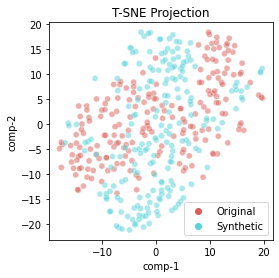

In [10]:
plt.figure(figsize=(4, 4))
sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", 2), alpha=0.5,
                data=df).set(title=f"T-SNE Projection")
plt.xlabel('comp-1')
plt.ylabel('comp-2')
plt.legend()

plt.show()

**Visualise adjacency matrix**

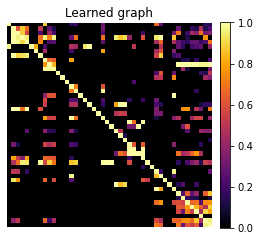

In [11]:
adj_matrix = gen.model.learned_graph(100).cpu().detach().numpy()
plt.figure(figsize=(4, 4))
im = plt.imshow(adj_matrix, cmap='inferno', interpolation='nearest', vmin=0, vmax=1.0)
plt.colorbar(im, fraction=0.046, pad=0.04)
plt.title('Learned graph')
plt.axis('off')
plt.show()